In [1]:
import numpy as np
import pandas as pd
from plotnine import *
from scipy.stats import binom, uniform

$\DeclareMathOperator*{\MEAN}{\mathbf{E}}$
$\DeclareMathOperator*{\VARIANCE}{\mathbf{D}}$
$\newcommand{\mean}[1]{\MEAN\left[#1\right]}$
$\newcommand{\variance}[1]{\VARIANCE\left[#1\right]}$
$\newcommand{\prob}[1]{\Pr\left[#1\right]}$
$\newcommand{\accuracy}{Acc}$
$\newcommand{\precision}{Prec}$
$\newcommand{\recall}{Rec}$

## Tulemuste empiiriline testimine

Teoreetilisi tulemusi on alati hea praktikas kontrollida.
Niimodi on võimalik leide lihtsasti valideerida ning ka avastada enamuse arvutusvigadest.

C:\Users\Mart\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log10


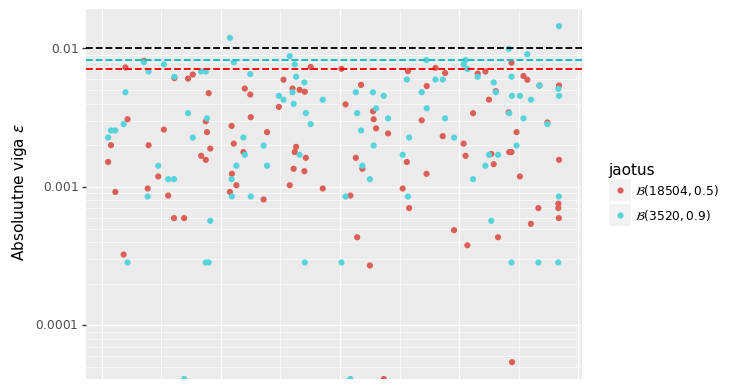

<ggplot: (132941924006)>

In [2]:
n = 100
partition_i = int(n * 0.95) - 1
epsilon = .01
xid = uniform.rvs(0, 1, n)

höff_n = 18504 # int(-np.log(.025) / (2 * epsilon ** 2))
höff_p = .5
höff_juhuslik = binom.rvs(n=höff_n, p=höff_p, size=n)
höff_viga = np.abs(höff_juhuslik / höff_n - höff_p)
höff_q95 = np.partition(höff_viga, partition_i)[partition_i]

binom_n = 3520
binom_p = .9
binom_juhuslik = binom.rvs(n=binom_n, p=binom_p, size=n)
binom_viga = np.abs(binom_juhuslik / binom_n - binom_p)
binom_q95 = np.partition(binom_viga, partition_i)[partition_i]

read = [(x, viga, f'$\mathcal{{B}}({höff_n}, {höff_p})$') for x, viga in zip(xid, höff_viga)]
read += [(x, viga, f'$\mathcal{{B}}({binom_n}, {binom_p})$') for x, viga in zip(xid, binom_viga)]
df = pd.DataFrame(read, columns=['x', 'viga', 'jaotus'])

g = (
    ggplot(df) +
    scale_y_log10(breaks=np.logspace(-4, -1, 4), labels=['$0.0001$', '$0.001$', '$0.01$', '$0.1$']) +
    theme(axis_title_x=element_blank(), axis_text_x=element_blank(), axis_ticks_major_x=element_blank()) +    
    aes('x', 'viga', color='jaotus') +
    labs(x='', y='Absoluutne viga $\\varepsilon$') +
    guides(color=guide_legend(title='jaotus')) +
    
    geom_point() +
    
    geom_hline(yintercept=epsilon, linetype='dashed', size=.75) +
    geom_hline(yintercept=höff_q95, linetype='dashed', color="r", size=.75) +
    geom_hline(yintercept=binom_q95, linetype='dashed', color="c", size=.75)
)

# g.save('./joonised/absoluutne_viga_statistiline_test.png', dpi=100)
g

Näiteks Höffdingi võrratuse põhjal kindlusega $95\%$ kuni ühe protsendise absouutse veahinnaguga õigsuse lähendi saavutamiseks on vaja valimit suurusega $18504$.
Eeldusel, et klassifitseerimismeetodi tegelik õigsus on $90\%$ on binoomjaotuse hinnangu põhjal vaja selleks $3520$ andmepunkti.
Joonisel on kujutatud antud näite empiiriline test, kus summa
\begin{equation*}
    S_N=\sum_{i=1}^N Z_i \enspace,
\end{equation*}
on juhuslikult genereeritud jaotusest $\mathcal{B}(18504; 0{,}5)$ Höffdingi võrratuse puhul (punane) ning $\mathcal{B}(3520; 0{,}9)$ binoomjaotuse hinnagu puhul (sinine).
Punktid joonisel tähistavad summal põhineva lähendi absoluutset viga
\begin{equation*}
    \varepsilon=\left|\frac{S_N}{N}-p\right|=\left|\widehat{\accuracy}-\accuracy\right| \enspace,
\end{equation*}
must joon veahinnanug absoluutväärtuse ülemist tõket, millest saadud veahinnang $\varepsilon$ peaks olema väiksem $95\%$ juhtudest.
Punane ja sinine joon on vastava jaotuse puhul tõmmatud läbi empiirilise testimise tulemusel saadud punkti, millest $95\%$ jäävad allapoole.
Binoomjaotuse hinnang on täpne ning langes ka antud juhul oodatule lähedale.
See-eest langes punane joon oodatust allapoole.
Kuna Höffdingi võrratus ülehindab valimi valjalikku suurust on punase joone langemine tema oodatud asukohast allapoole loomulik, sest suurem valim tähendab täpsemat lähendit ja seega väiksemat viga.